In [1]:
import sys
sys.path.append("../../")

In [2]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.multi_objective.pareto import is_non_dominated
from botorch.test_functions.multi_objective import GMM, BraninCurrin
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning
from botorch.utils.multi_objective.box_decompositions.non_dominated import FastNondominatedPartitioning

from benchmarks.rover import Rover

tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),
}
SEED = 42
# Setting seed for reproducibility
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
# define problem
# problem = BraninCurrin(negate=True).to(**tkwargs)
problem = GMM(negate=True).to(**tkwargs)
problem.ref_point = torch.tensor([0., 0.], **tkwargs)

## Problem

The approximated pareto set and pareto front is shown in the following figure.

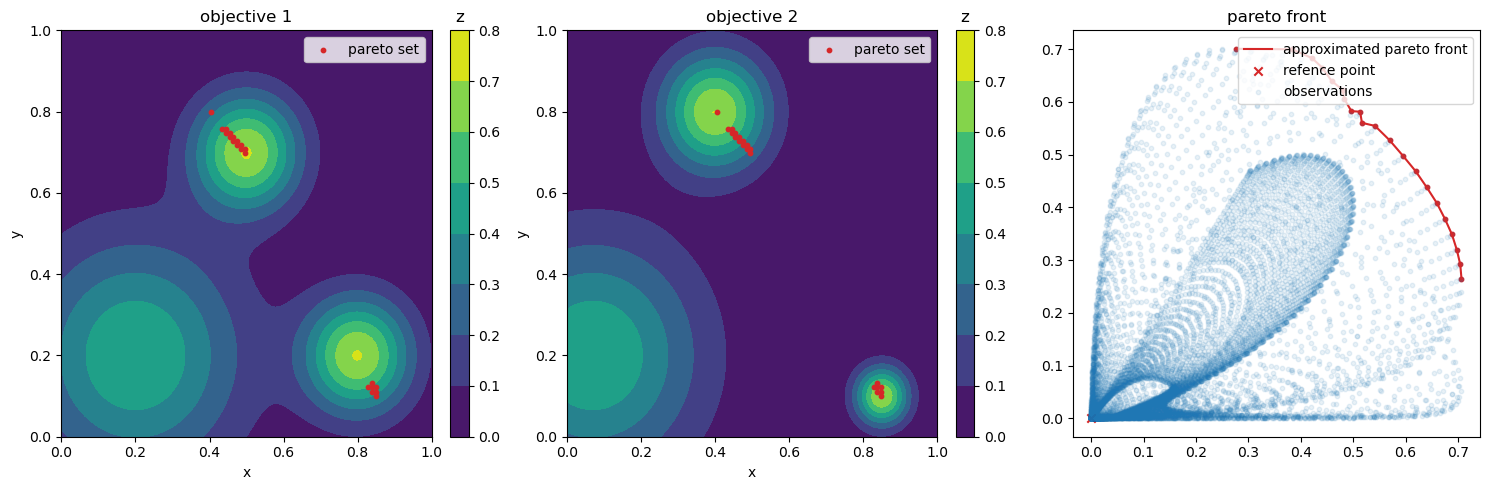

In [4]:
from plot_utils import plot_objective

plot_objective(problem, num_samples=100)

In [5]:
def generate_initial_data(problem, n=6):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [6]:
init_x, init_y = generate_initial_data(problem, n=6)

## Generate data

In [7]:
from optimizers.mbore.mbore_rff import MBORE_RFF


In [8]:
def plot_input_space(xx, yy, x_obs, preds, fig, ax, title=None):
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')

    # plot functions
    countourset = ax.contourf(
        xx,
        yy,
        preds.reshape(xx.shape),
    )
    ax.scatter(*x_obs.t(), alpha=0.3, s=10, color='tab:red')

    cax.grid(False)  # just to remove the warning
    clb = fig.colorbar(countourset, cax=cax)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    clb.ax.set_title('z')


def plot_pareto_space(y_obs, pareto, l, u_nbd, ax, title='pareto'):
    ax.scatter(*y_obs[~pareto].t(), s=10, alpha=0.3)
    ax.scatter(*l.t(), s=10, color='tab:red', label="pareto")
    ax.plot(*l.t(), color='tab:red')
    # ax.scatter(*u_nbd.t(), s=10, label="non dominated", color='tab:purple')
    ax.scatter(*problem.ref_point.t(), s=10, color='k', label="ref point")

    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_title(title)
    ax.legend()


def plot_pareto_box(tau, boxes, ax):
    ax.scatter(*tau.t(), label=r"$\mathbf{\tau}$")
    pc = PatchCollection(boxes, cmap='tab10', alpha=.3)
    pc.set_array(torch.arange(0, len(boxes)))
    ax.add_collection(pc)
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.axvspan(x_lim[0], tau[0], alpha=0.1, color='tab:gray')
    ax.axhspan(y_lim[0], tau[1], alpha=0.1, color='tab:gray')
    ax.set_xlim(*x_lim)
    ax.set_ylim(*y_lim)

2024-03-19 09:26:53,223 | MBORE_RFF


Iteration 0


2024-03-19 09:26:53,807 | Model fitting takes 0.58s
2024-03-19 09:26:54,136 | Optimizing the acquisition function takes 0.33s


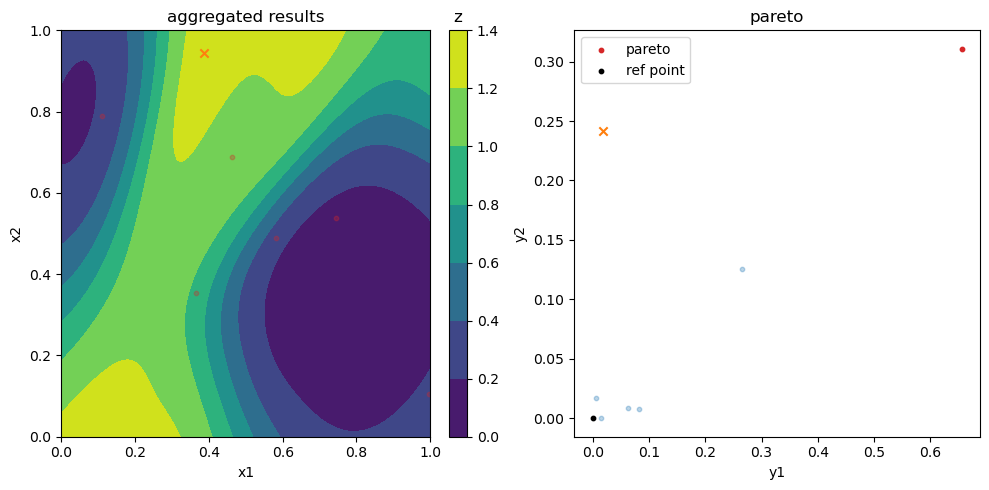

2024-03-19 09:26:54,890 | MBORE_RFF


Iteration 1


2024-03-19 09:26:55,129 | Model fitting takes 0.24s
2024-03-19 09:26:55,565 | Optimizing the acquisition function takes 0.44s


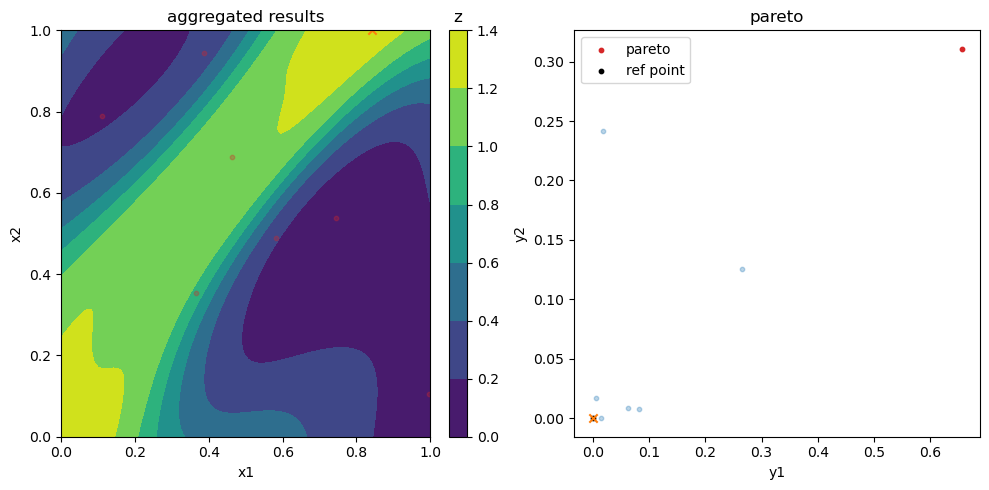

2024-03-19 09:26:56,309 | MBORE_RFF


Iteration 2


2024-03-19 09:26:56,590 | Model fitting takes 0.28s
2024-03-19 09:26:57,368 | Optimizing the acquisition function takes 0.78s


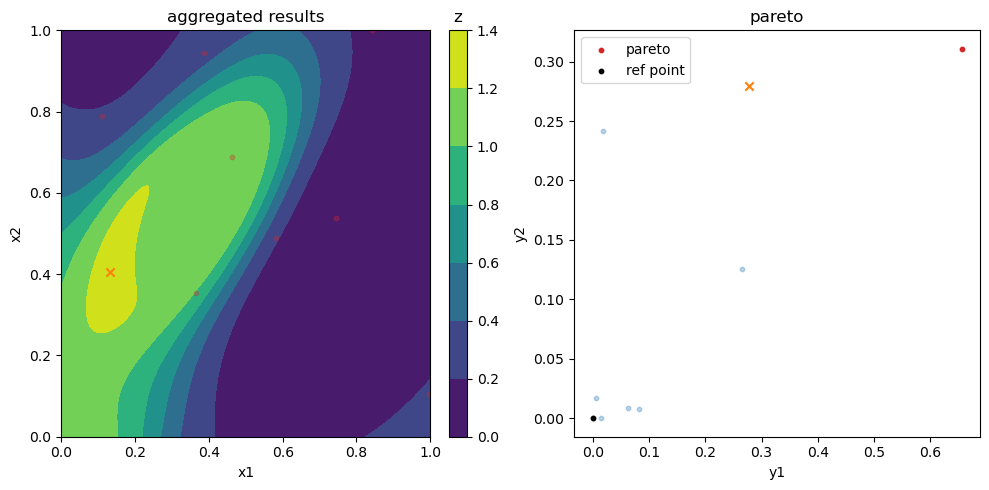

2024-03-19 09:26:58,119 | MBORE_RFF


Iteration 3


2024-03-19 09:26:58,394 | Model fitting takes 0.27s
2024-03-19 09:26:58,666 | Optimizing the acquisition function takes 0.27s


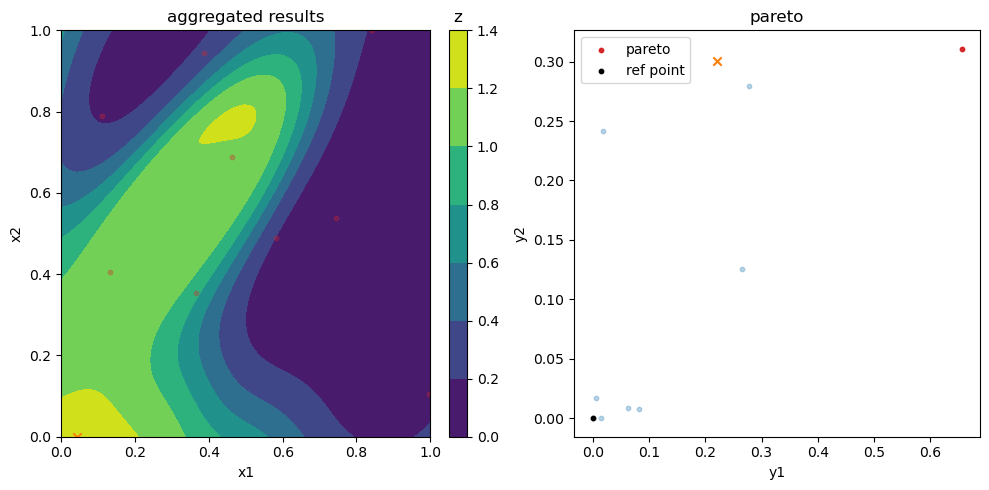

2024-03-19 09:26:59,408 | MBORE_RFF


Iteration 4


2024-03-19 09:26:59,709 | Model fitting takes 0.30s
2024-03-19 09:27:00,464 | Optimizing the acquisition function takes 0.75s


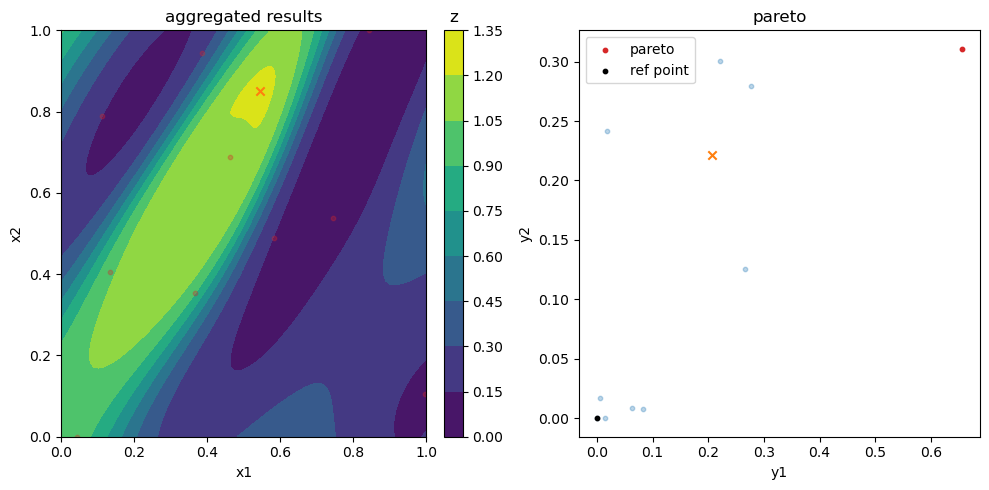

2024-03-19 09:27:01,361 | MBORE_RFF


Iteration 5


2024-03-19 09:27:01,625 | Model fitting takes 0.26s
2024-03-19 09:27:02,235 | Optimizing the acquisition function takes 0.61s


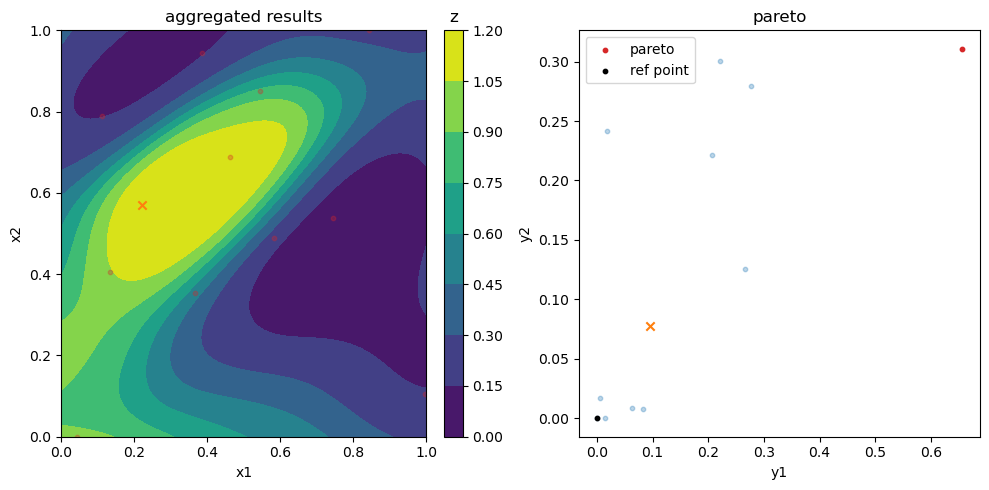

2024-03-19 09:27:02,984 | MBORE_RFF


Iteration 6


2024-03-19 09:27:03,364 | Model fitting takes 0.38s
2024-03-19 09:27:03,788 | Optimizing the acquisition function takes 0.42s


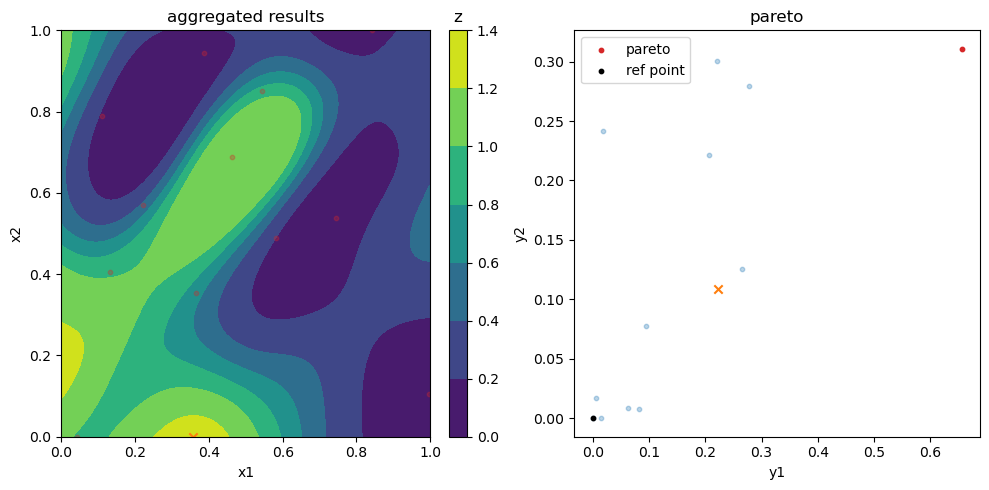

2024-03-19 09:27:04,534 | MBORE_RFF


Iteration 7


2024-03-19 09:27:04,826 | Model fitting takes 0.29s
2024-03-19 09:27:05,248 | Optimizing the acquisition function takes 0.42s


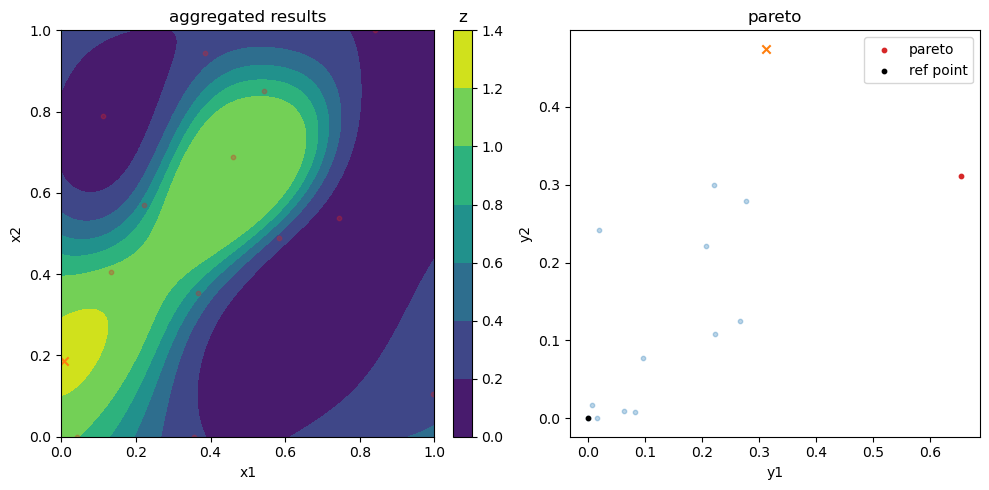

2024-03-19 09:27:05,995 | MBORE_RFF


Iteration 8


2024-03-19 09:27:06,286 | Model fitting takes 0.29s
2024-03-19 09:27:06,490 | Optimizing the acquisition function takes 0.20s


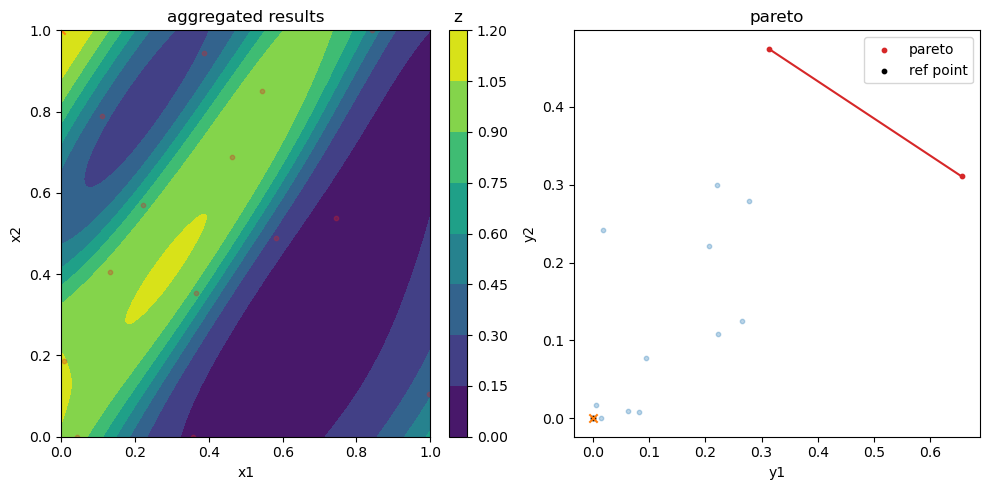

2024-03-19 09:27:07,233 | MBORE_RFF


Iteration 9


2024-03-19 09:27:07,593 | Model fitting takes 0.36s
2024-03-19 09:27:08,135 | Optimizing the acquisition function takes 0.54s


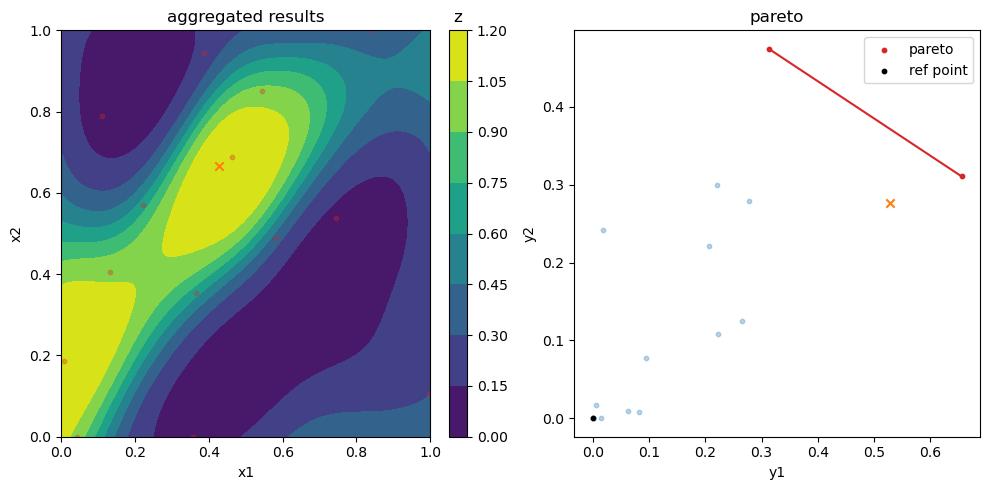

2024-03-19 09:27:08,876 | MBORE_RFF


Iteration 10


2024-03-19 09:27:09,338 | Model fitting takes 0.46s
2024-03-19 09:27:09,665 | Optimizing the acquisition function takes 0.32s


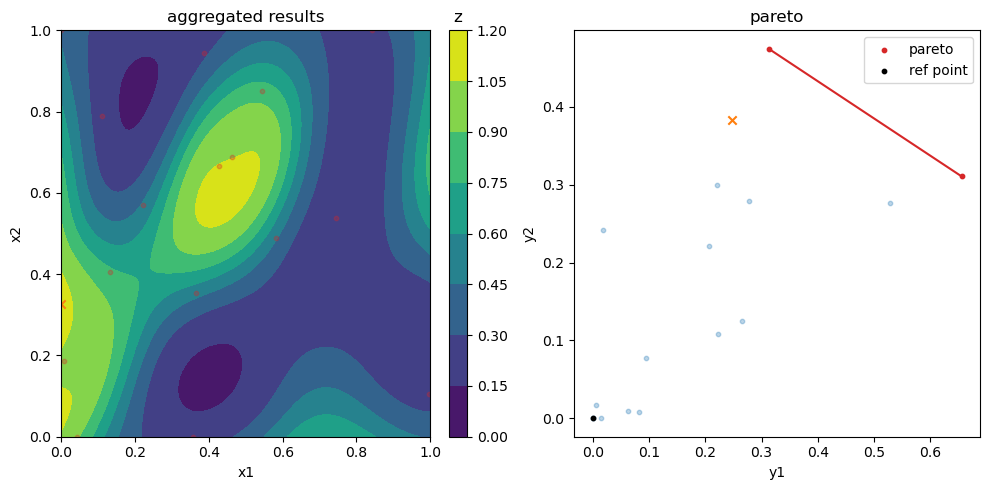

2024-03-19 09:27:10,409 | MBORE_RFF


Iteration 11


2024-03-19 09:27:10,830 | Model fitting takes 0.42s
2024-03-19 09:27:11,149 | Optimizing the acquisition function takes 0.32s


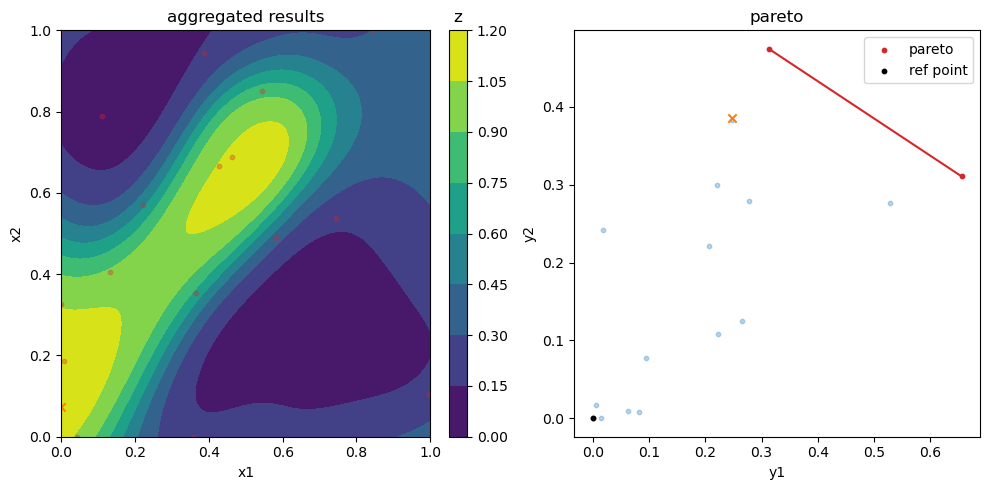

2024-03-19 09:27:11,890 | MBORE_RFF


Iteration 12


2024-03-19 09:27:12,354 | Model fitting takes 0.46s
2024-03-19 09:27:12,736 | Optimizing the acquisition function takes 0.38s


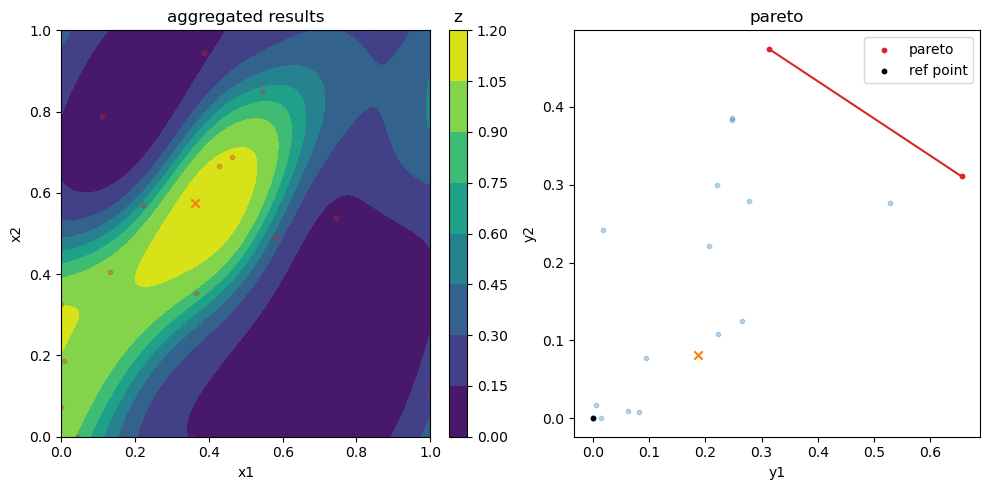

2024-03-19 09:27:13,476 | MBORE_RFF


Iteration 13


2024-03-19 09:27:13,880 | Model fitting takes 0.40s
2024-03-19 09:27:14,187 | Optimizing the acquisition function takes 0.31s


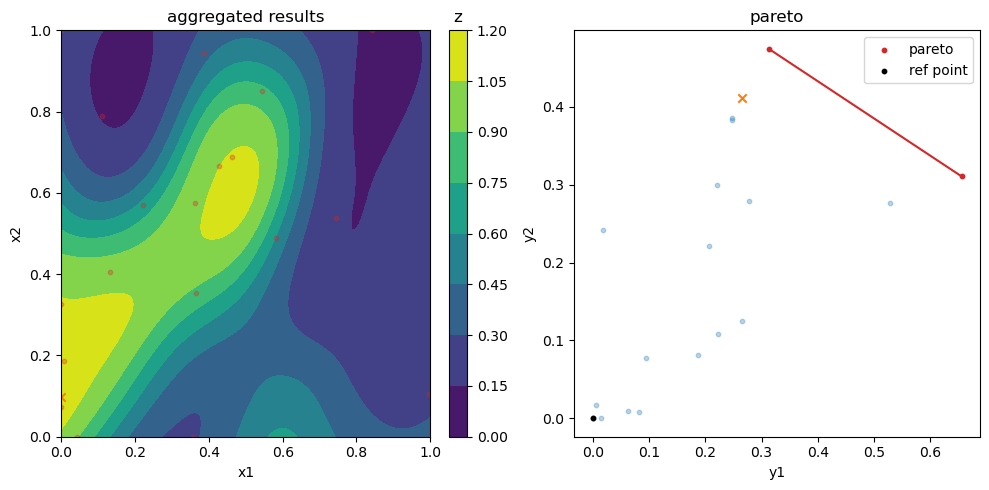

2024-03-19 09:27:15,093 | MBORE_RFF


Iteration 14


2024-03-19 09:27:15,493 | Model fitting takes 0.40s
2024-03-19 09:27:15,864 | Optimizing the acquisition function takes 0.37s


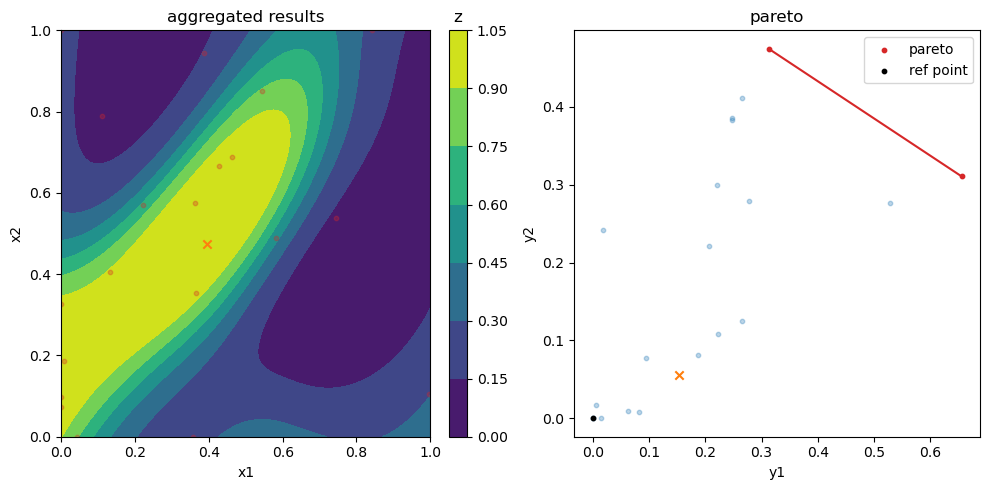

2024-03-19 09:27:16,605 | MBORE_RFF


Iteration 15


2024-03-19 09:27:17,036 | Model fitting takes 0.43s
2024-03-19 09:27:17,395 | Optimizing the acquisition function takes 0.36s


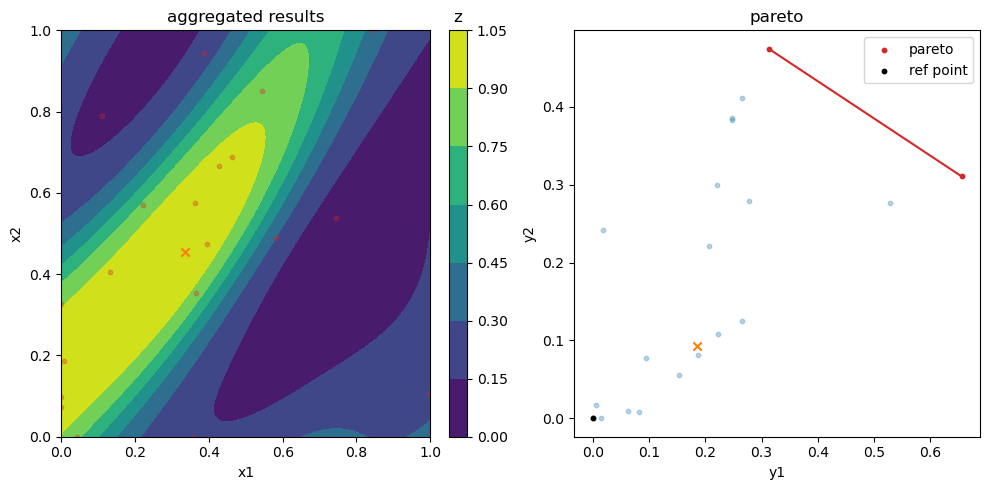

2024-03-19 09:27:18,133 | MBORE_RFF


Iteration 16


2024-03-19 09:27:18,688 | Model fitting takes 0.55s
2024-03-19 09:27:18,947 | Optimizing the acquisition function takes 0.26s


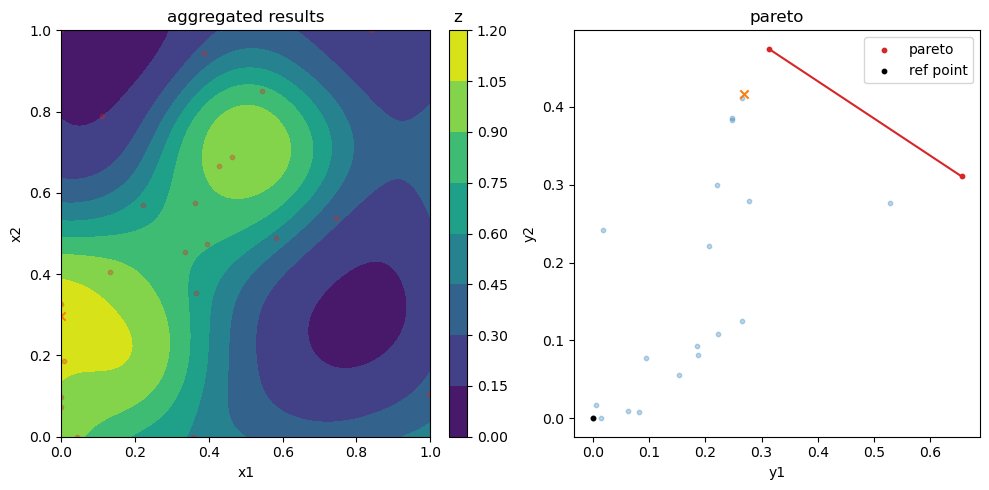

2024-03-19 09:27:19,692 | MBORE_RFF


Iteration 17


2024-03-19 09:27:20,138 | Model fitting takes 0.44s
2024-03-19 09:27:20,469 | Optimizing the acquisition function takes 0.33s


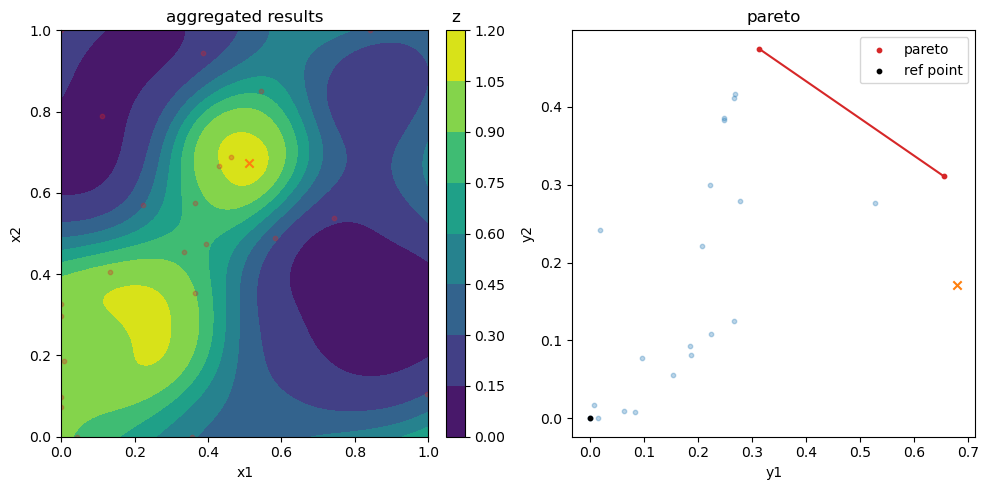

2024-03-19 09:27:21,211 | MBORE_RFF


Iteration 18


2024-03-19 09:27:21,687 | Model fitting takes 0.47s
2024-03-19 09:27:22,014 | Optimizing the acquisition function takes 0.33s


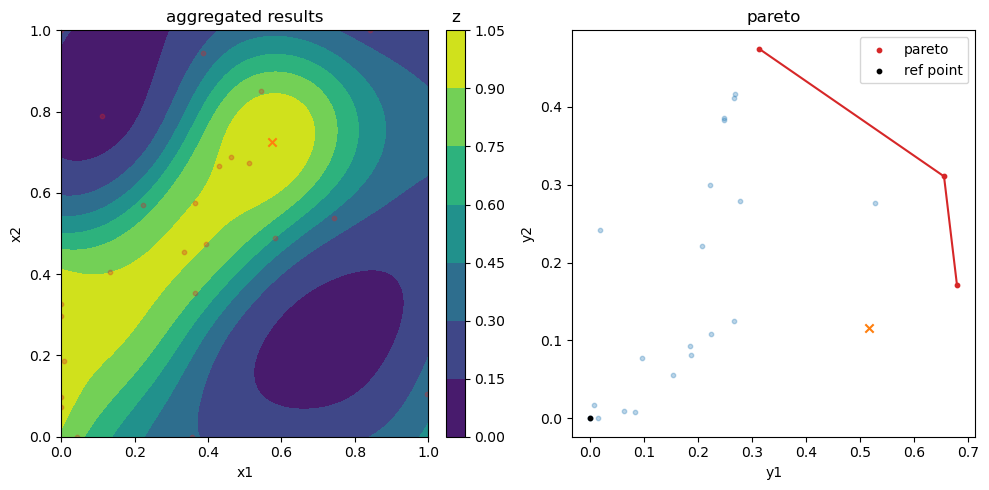

2024-03-19 09:27:22,759 | MBORE_RFF


Iteration 19


2024-03-19 09:27:23,240 | Model fitting takes 0.48s
2024-03-19 09:27:23,572 | Optimizing the acquisition function takes 0.33s


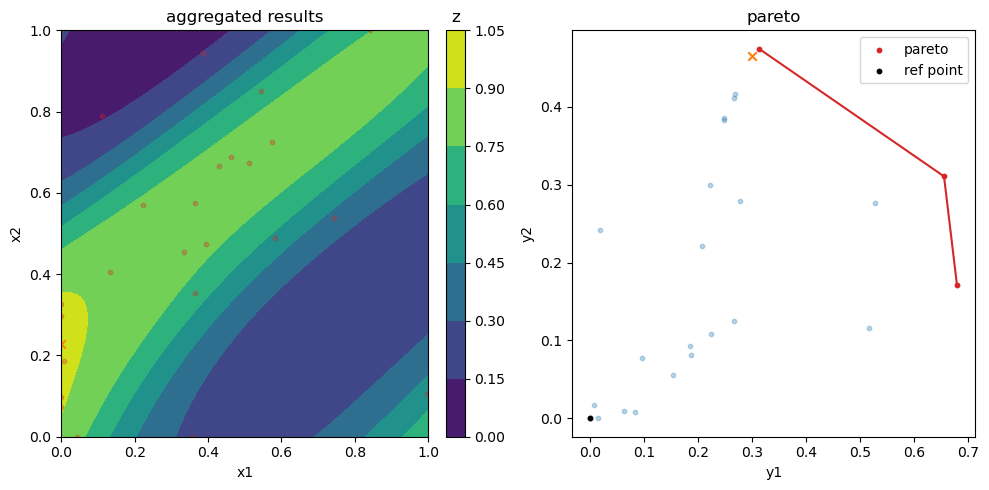

2024-03-19 09:27:24,313 | MBORE_RFF


Iteration 20


2024-03-19 09:27:24,893 | Model fitting takes 0.58s
2024-03-19 09:27:25,253 | Optimizing the acquisition function takes 0.36s


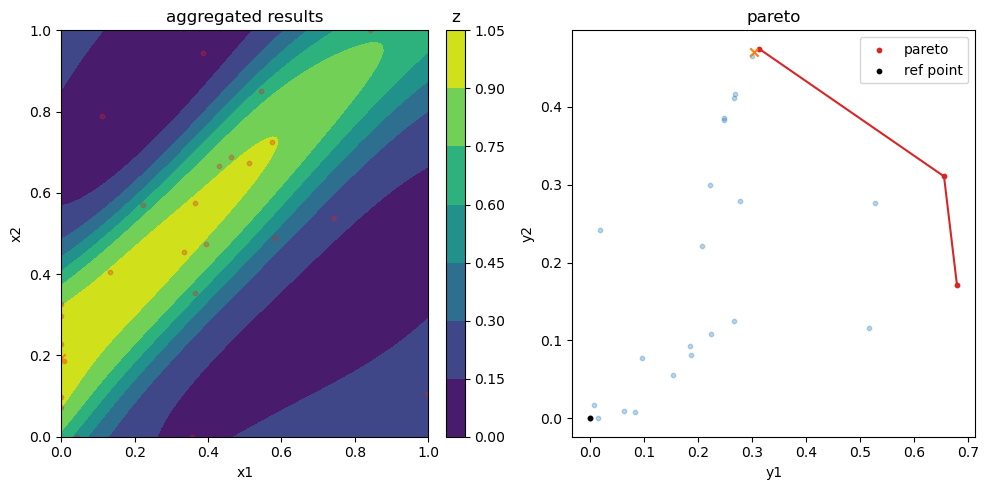

2024-03-19 09:27:25,991 | MBORE_RFF


Iteration 21


2024-03-19 09:27:26,636 | Model fitting takes 0.64s
2024-03-19 09:27:26,941 | Optimizing the acquisition function takes 0.30s


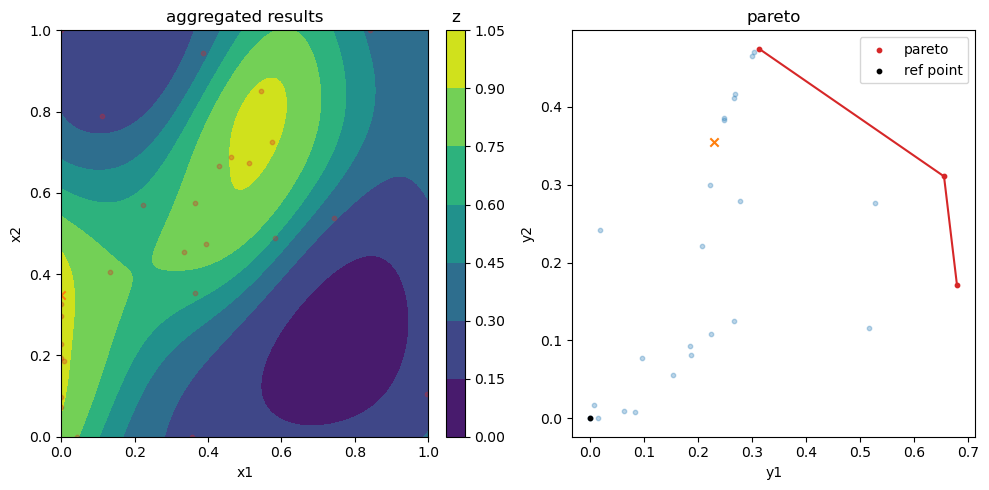

2024-03-19 09:27:27,680 | MBORE_RFF


Iteration 22


2024-03-19 09:27:28,206 | Model fitting takes 0.52s
2024-03-19 09:27:28,492 | Optimizing the acquisition function takes 0.29s


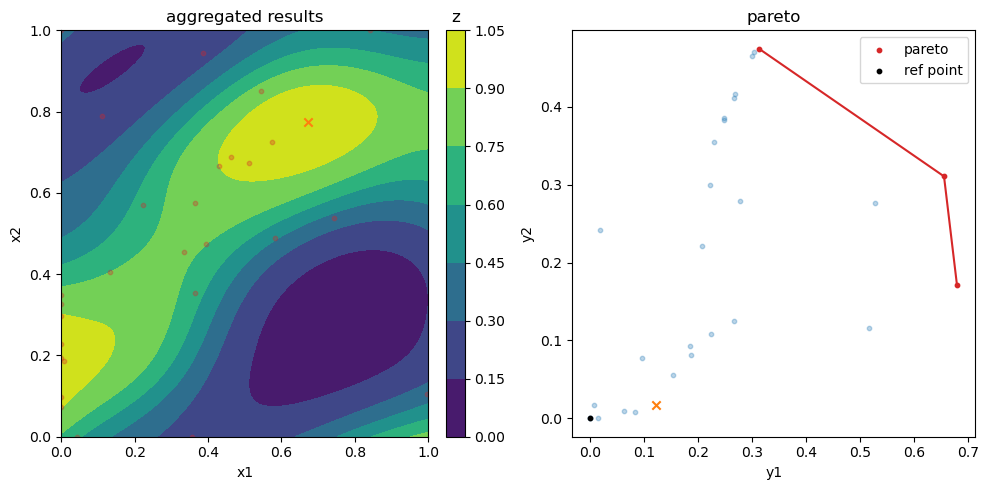

2024-03-19 09:27:29,397 | MBORE_RFF


Iteration 23


2024-03-19 09:27:29,986 | Model fitting takes 0.59s
2024-03-19 09:27:30,372 | Optimizing the acquisition function takes 0.38s


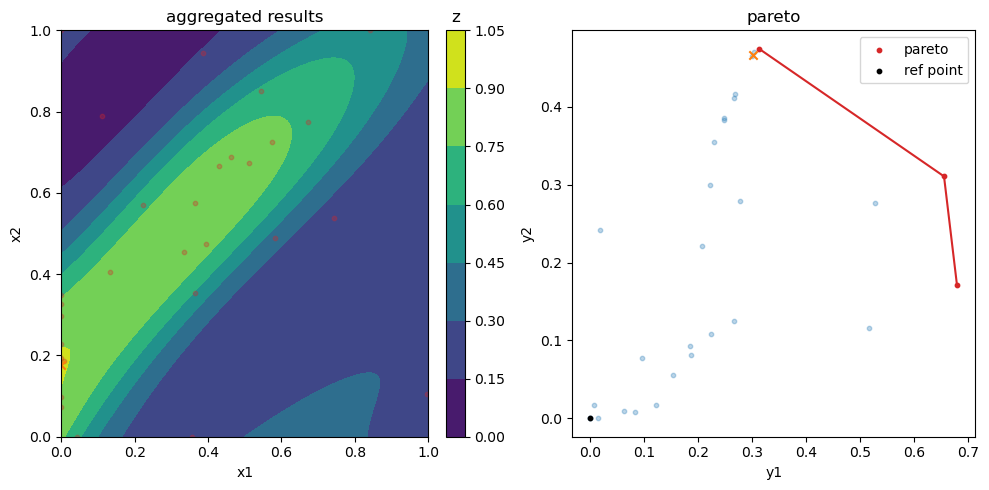

2024-03-19 09:27:31,108 | MBORE_RFF


Iteration 24


2024-03-19 09:27:31,669 | Model fitting takes 0.56s
2024-03-19 09:27:31,960 | Optimizing the acquisition function takes 0.29s


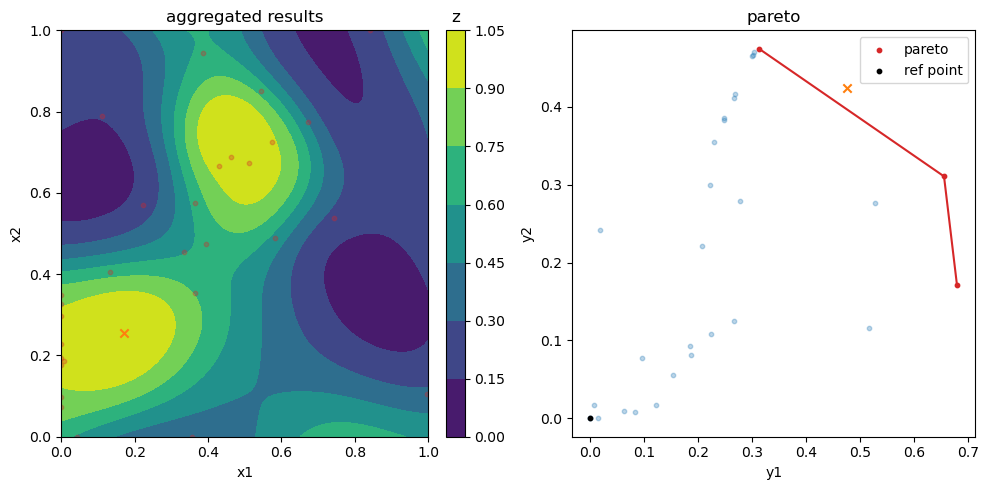

2024-03-19 09:27:32,698 | MBORE_RFF


Iteration 25


2024-03-19 09:27:33,384 | Model fitting takes 0.68s
2024-03-19 09:27:33,681 | Optimizing the acquisition function takes 0.30s


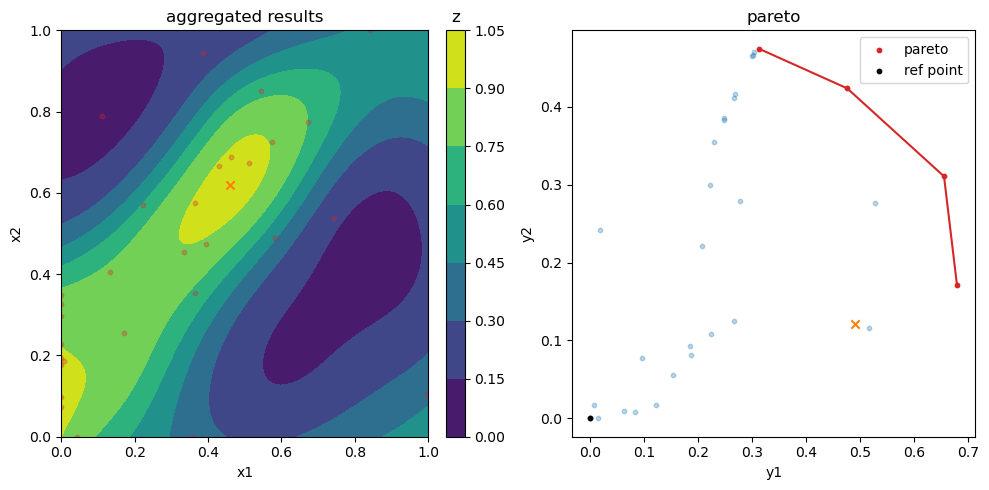

2024-03-19 09:27:34,419 | MBORE_RFF


Iteration 26


2024-03-19 09:27:35,196 | Model fitting takes 0.77s
2024-03-19 09:27:35,604 | Optimizing the acquisition function takes 0.41s


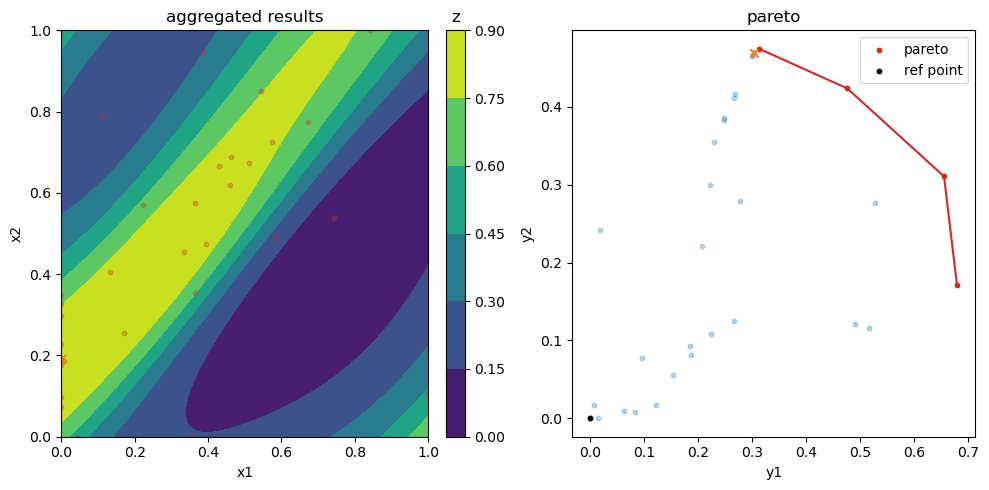

2024-03-19 09:27:36,339 | MBORE_RFF


Iteration 27


2024-03-19 09:27:36,987 | Model fitting takes 0.65s
2024-03-19 09:27:37,413 | Optimizing the acquisition function takes 0.42s


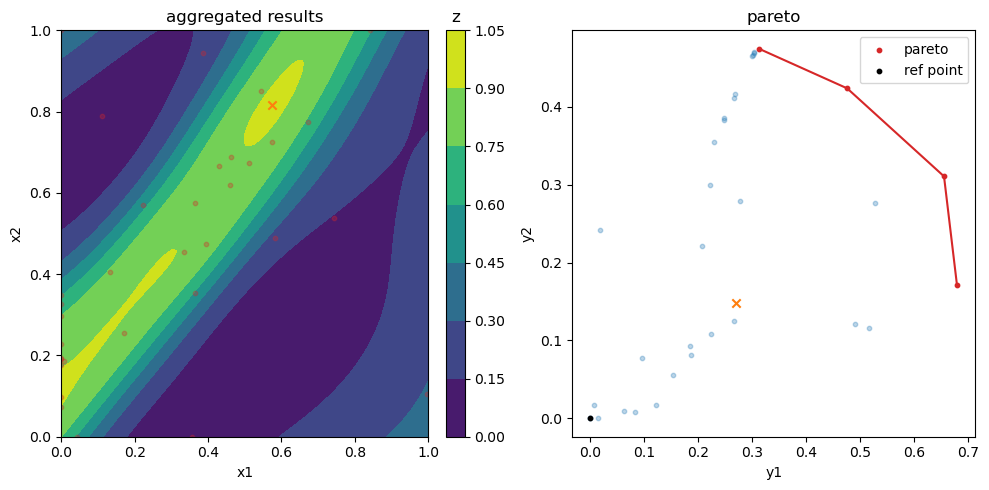

2024-03-19 09:27:38,151 | MBORE_RFF


Iteration 28


2024-03-19 09:27:38,730 | Model fitting takes 0.58s
2024-03-19 09:27:39,093 | Optimizing the acquisition function takes 0.36s


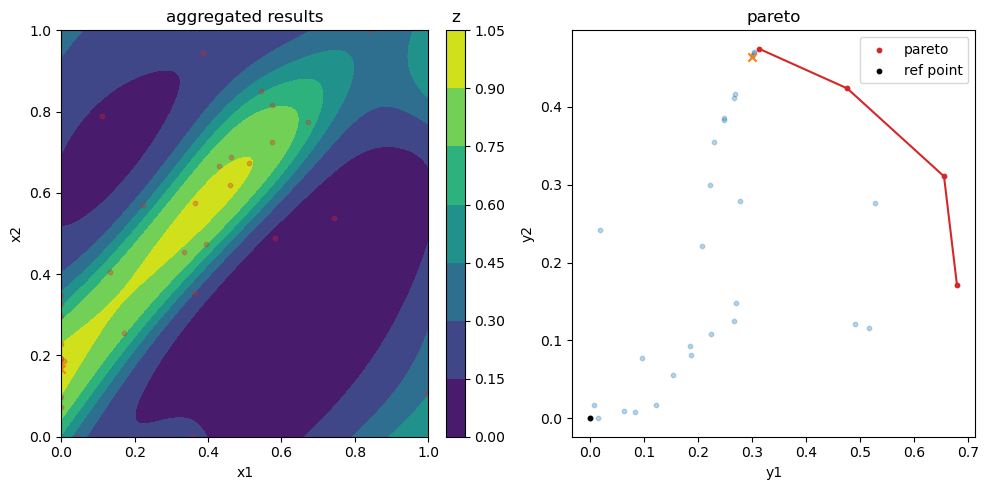

2024-03-19 09:27:39,831 | MBORE_RFF


Iteration 29


2024-03-19 09:27:40,487 | Model fitting takes 0.65s
2024-03-19 09:27:40,812 | Optimizing the acquisition function takes 0.32s


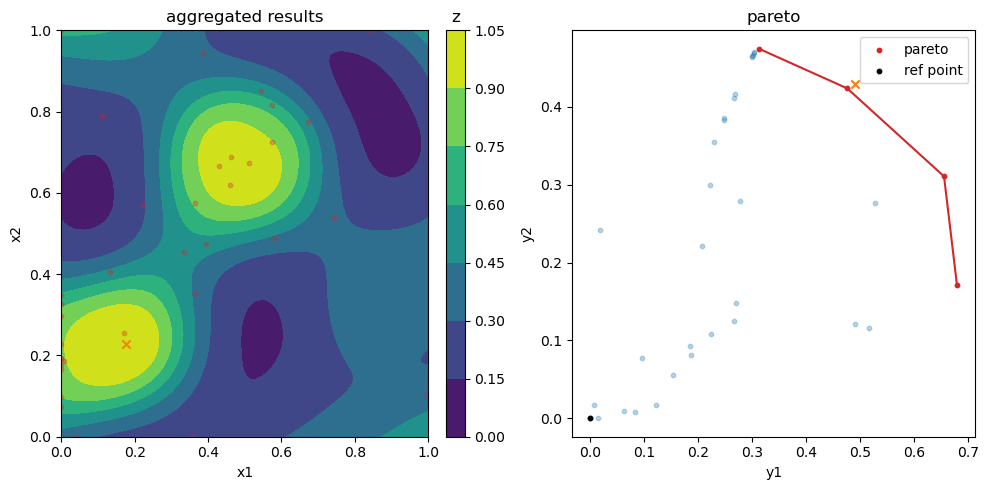

In [9]:
x_obs = init_x
y_obs = init_y

num_obj = problem.num_objectives
# only plot the first two dimensions
xx, yy = np.meshgrid(
    np.linspace(
        *problem.bounds.t()[0], 100
    ),
    np.linspace(
        *problem.bounds.t()[1], 100
    ),
)
x_cands = np.vstack((xx.flatten(), yy.flatten())).T
x_cands = torch.from_numpy(x_cands).to(**tkwargs)
y_cands = problem(x_cands).reshape(100, 100, num_obj)
xx_obj, yy_obj = y_cands[:, :, 0], y_cands[:, :, 1]

for n in range(30):
    print(f"Iteration {n}")

    pareto = is_non_dominated(y_obs)
    bd = DominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    nbd = FastNondominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    u, l = bd.hypercell_bounds
    u_nbd, _ = nbd.hypercell_bounds

    boxes = [Rectangle(
        l_point.cpu(),
        *(u_point - l_point).cpu(),
    ) for l_point, u_point in zip(l, u)]

    optimizer = MBORE_RFF(
        problem=problem,
        weight_type='ei'
    )
    new_x = optimizer.observe_and_suggest(x_obs, y_obs, S=100)
    new_y = problem(new_x)

    preds = torch.empty(0, **tkwargs)
    i = 0
    while i < x_cands.shape[0]:
        with torch.no_grad():
            p = optimizer.acq_func(x_cands[i:i+1000].unsqueeze(1))
        i += 1000
        preds = torch.cat([preds, p])

    # plot aggregated results
    fig = plt.figure(figsize=(10, 5))
    ax_agg = plt.subplot2grid((1, 2), (0, 0))
    plot_input_space(xx, yy, x_obs, preds, fig, ax_agg, title="aggregated results")
    ax_agg.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')

    ax_agg_p = plt.subplot2grid((1,  2), (0, 1))
    plot_pareto_space(y_obs, pareto, l, u_nbd, ax_agg_p, title='pareto')
    ax_agg_p.scatter(*new_y.t(), marker='x', color='tab:orange', label='candidates')

    plt.tight_layout()
    plt.show()
    x_obs = torch.cat([x_obs, new_x])
    y_obs = torch.cat([y_obs, new_y])